# **Clusterização**

# 1. Importação dos dados

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
url = 'https://raw.githubusercontent.com/Mirlaa/Clusterizacao-dados-sem-rotulo/main/Dados/dados_mkt.csv'
dados = pd.read_csv(url)
dados.head()

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0


In [3]:
dados.shape

(12992, 27)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

In [5]:
dados['sexo'].unique()

array(['F', 'M', 'NE'], dtype=object)

# 2. Tratamento de dados categóricos usando Encoder

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = [['F', 'M', 'NE']], sparse_output=False)


In [7]:
encoded_sexo = encoder.fit_transform(dados[['sexo']])
encoded_sexo

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [8]:
encoded_dados = pd.DataFrame(encoded_sexo, columns=encoder.get_feature_names_out(['sexo']))
encoded_dados

,sexo_F,sexo_M,sexo_NE
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
12987,1.0,0.0,0.0
12988,1.0,0.0,0.0
12989,1.0,0.0,0.0
12990,1.0,0.0,0.0


In [9]:
dados = pd.concat([dados, encoded_dados], axis=1).drop(columns='sexo')

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              12992 non-null  int64  
 1   numero_de_amigos   12992 non-null  int64  
 2   basquete           12992 non-null  int64  
 3   futebol_americano  12992 non-null  int64  
 4   futebol            12992 non-null  int64  
 5   softbol            12992 non-null  int64  
 6   voleibol           12992 non-null  int64  
 7   natacao            12992 non-null  int64  
 8   animacao           12992 non-null  int64  
 9   beisebol           12992 non-null  int64  
 10  tenis              12992 non-null  int64  
 11  esportes           12992 non-null  int64  
 12  fofo               12992 non-null  int64  
 13  danca              12992 non-null  int64  
 14  banda              12992 non-null  int64  
 15  marcha             12992 non-null  int64  
 16  musica             129

In [11]:
import joblib
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

# Desenvolvendo o modelo inicial - K-Means

In [12]:
from sklearn.cluster import KMeans

modelo_kmeans = KMeans(n_clusters=2, random_state=42)

In [13]:
modelo = modelo_kmeans.fit(dados)

Valor de Inercia do modelo

In [14]:
modelo.inertia_

24912957.594588462

Valores médios de silhueta

In [15]:
from sklearn.metrics import silhouette_score

silhouette_score(dados, modelo.labels_)

np.float64(0.3799715886302017)

In [16]:
silhouette_score(dados, modelo.predict(dados))

np.float64(0.3799715886302017)

In [17]:
 modelo.predict(dados)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

O modelo não atendeu satisfatoriamente.

# Testando novos valores de clusters

In [46]:
def avaliacao(dados, n):
  df = pd.DataFrame({'Inercia': [], 'Silhueta': [], 'k': []})
  for i in range(2, n):
    modelo_kmeans = KMeans(n_clusters = i, random_state=42)
    modelo = modelo_kmeans.fit(dados)
    inercia = modelo.inertia_
    silhueta = silhouette_score(dados, modelo.labels_)
    k = i
    df = pd.concat([df, pd.DataFrame({'Inercia': [inercia], 'Silhueta': [silhueta], 'k': [k]})])

  return df

In [59]:
def graf_inercia_silhueta(df):
  import pandas as pd
  import matplotlib.pyplot as plt

  fig, ax1 = plt.subplots()

  # Primeiro eixo Y (inércia)
  ax1.set_xlabel('Número de clusters (k)')
  ax1.set_ylabel('Inércia', color='tab:red')
  ax1.plot(df['k'], df['Inercia'], color='tab:red', marker='o', label='Inércia')
  ax1.tick_params(axis='y', labelcolor='tab:red')

  ax1.grid(True, linestyle='--', color='lightgray')

  min_k = int(df['k'].min())
  max_k = int(df['k'].max())
  plt.xticks(range(min_k, max_k + 1))

  # Segundo eixo Y (silhueta)
  ax2 = ax1.twinx()
  ax2.set_ylabel('Coeficiente de Silhueta', color='tab:blue')
  ax2.plot(df['k'], df['Silhueta'], color='tab:blue', marker='s', label='Silhueta')
  ax2.tick_params(axis='y', labelcolor='tab:blue')

  fig.tight_layout()
  plt.title('Avaliação de K - Inércia e Silhueta')
  plt.show()

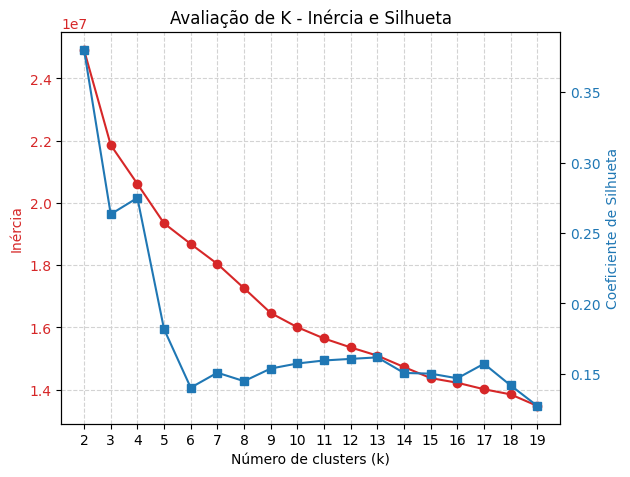

In [58]:
df = avaliacao(dados, 20)
graf_inercia_silhueta(df)

In [60]:
def graf_silhueta (n_clusters, dados):
    import matplotlib.cm as cm
    from sklearn.metrics import silhouette_samples

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados)

    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')

    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados, cluster_previsoes)

    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()

        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i

        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra,
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos

    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')

    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')

    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])

    plt.show()

Valor médio para 5 clusters: 0.276


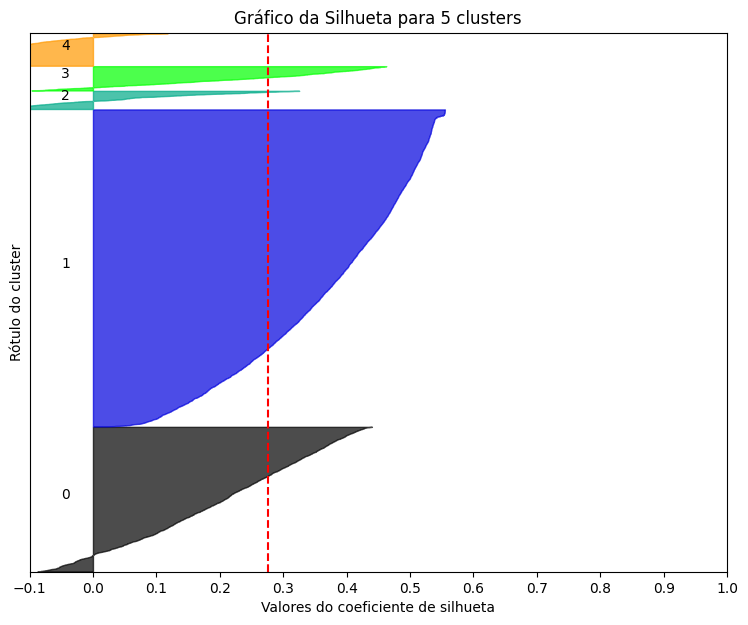

In [34]:
graf_silhueta(5, dados)

# Normalizando dados para corrigir e melhorar o modelo

In [38]:
dados.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,26.852679,31.283790,3.063424,2.927186,2.536946,1.836515,1.641010,1.548645,1.207666,1.198430,...,1.340055,2.977986,4.094828,1.720289,0.819735,0.589594,1.050647,0.761469,0.166256,0.072275
std,1.203746,35.891178,8.374443,7.431099,9.810703,7.881526,6.818708,5.862203,5.376673,5.558905,...,4.934874,7.479126,7.670547,5.092112,3.799795,2.999547,4.492218,0.426202,0.372325,0.258953
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,28.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,30.000000,605.000000,220.000000,90.000000,220.000000,170.000000,140.000000,310.000000,80.000000,140.000000,...,70.000000,120.000000,110.000000,80.000000,80.000000,80.000000,80.000000,1.000000,1.000000,1.000000


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

In [41]:
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados.columns)

In [43]:
dados_normalizados.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.650298,0.051709,0.013925,0.032524,0.011532,0.010803,0.011721,0.004996,0.015096,0.008560,...,0.019144,0.024817,0.037226,0.021504,0.010247,0.007370,0.013133,0.761469,0.166256,0.072275
std,0.133750,0.059324,0.038066,0.082568,0.044594,0.046362,0.048705,0.018910,0.067208,0.039706,...,0.070498,0.062326,0.069732,0.063651,0.047497,0.037494,0.056153,0.426202,0.372325,0.258953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.555556,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.666667,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.777778,0.074380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Construindo novo modelo

In [61]:
df = avaliacao(dados_normalizados, 20)

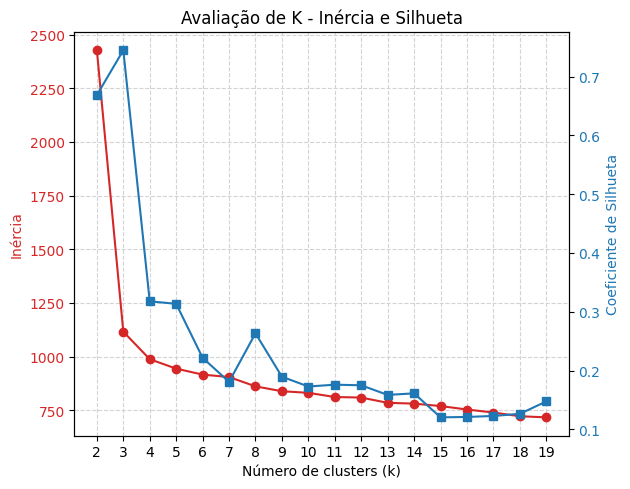

In [57]:
graf_inercia_silhueta(df)

Observamos que o modelo apresenta melhor desempenho para k = 3

In [63]:
modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
modelo_kmeans.fit(dados_normalizados)

KMeans(n_clusters=3, random_state=42)

In [64]:
joblib.dump(modelo_kmeans, 'modelo_kmeans.pkl')

['modelo_kmeans.pkl']

In [65]:
dados_analise = pd.DataFrame()

In [66]:
dados_analise[dados_normalizados.columns] = scaler.inverse_transform(dados_normalizados)
dados_analise

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27.0,49.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
1,27.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2,26.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,32.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
12988,26.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12989,27.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12990,27.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
dados_analise['cluster'] = modelo_kmeans.labels_

In [73]:
cluster_media = dados_analise.groupby('cluster').mean()
cluster_media

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
cluster,,,,,,,,,,,,,,,,,,,,,
0,26.787830,32.382796,2.959668,2.462347,2.567472,2.273325,1.935712,1.693116,1.441423,0.792480,...,1.577883,3.260892,4.943900,1.934701,0.893561,0.670171,1.078540,1.0,0.0,0.0
1,27.031944,26.173611,3.763889,5.347222,2.592593,0.097222,0.453704,0.976852,0.092593,3.231481,...,0.384259,1.652778,0.523148,0.861111,0.425926,0.263889,0.949074,0.0,1.0,0.0
2,27.123536,31.460064,2.545261,2.257721,2.087327,1.235357,1.267306,1.341853,1.309904,0.798722,...,1.033014,3.045793,3.365282,1.437700,0.947817,0.489883,0.990415,0.0,0.0,1.0


In [74]:
cluster_media = cluster_media.T
cluster_media.columns = ['0', '1', '2']
cluster_media

,0,1,2
idade,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquete,2.959668,3.763889,2.545261
futebol_americano,2.462347,5.347222,2.257721
futebol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacao,1.693116,0.976852,1.341853
animacao,1.441423,0.092593,1.309904
beisebol,0.792480,3.231481,0.798722


# Descrevendo cada agrupamento

In [76]:
cluster_media['0'].sort_values(ascending = False)

,0
numero_de_amigos,32.382796
idade,26.787830
musica,8.541393
cabelo,5.626200
danca,5.463459
compras,4.943900
fofo,4.413221
banda,3.368038
shopping,3.260892
basquete,2.959668


In [77]:
cluster_media['1'].sort_values(ascending = False)

,1
idade,27.031944
numero_de_amigos,26.173611
musica,8.180556
futebol_americano,5.347222
banda,4.120370
basquete,3.763889
beisebol,3.231481
rock,3.148148
futebol,2.592593
danca,2.578704


In [78]:
cluster_media['2'].sort_values(ascending = False)

,2
numero_de_amigos,31.460064
idade,27.123536
musica,7.103301
danca,4.749734
cabelo,4.345048
fofo,3.642173
compras,3.365282
shopping,3.045793
banda,2.758253
basquete,2.545261
